# **Exploratory Data Analysis**

## **Libraries Importation**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr
from itertools import combinations

## **Data Ingestion**

In [33]:
import os

def ingest_data(file_path: str):

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found at path: {file_path}")

    ext = os.path.splitext(file_path)[1].lower()

    try:
        if ext == '.csv':
            df = pd.read_csv(file_path)
        elif ext in ['.xls', '.xlsx']:
            df = pd.read_excel(file_path)
        elif ext == '.json':
            df = pd.read_json(file_path)
        elif ext == '.parquet':
            df = pd.read_parquet(file_path)
        elif ext == '.pkl':
            df = pd.read_pickle(file_path)
        else:
            raise ValueError(f"Unsupported file format: {ext}")

        print(f"Successfully loaded data from '{file_path}'")
        print(f" Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
        return df

    except Exception as e:
        print(f"Error reading file: {e}")
        return None


df = ingest_data("C:\\Users\\Oshea\\Documents\\module_3\\examsim\\data_output\\eda_data.csv")

df.head(5)

Successfully loaded data from 'C:\Users\Oshea\Documents\module_3\examsim\data_output\eda_data.csv'
 Shape: 25480 rows × 12 columns



,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,ezyv01,asia,high school,n,n,14513,2007,west,592.2029,hour,y,denied
1,ezyv02,asia,master's,y,n,2412,2002,northeast,83425.6500,year,y,certified
2,ezyv03,asia,bachelor's,n,y,44444,2008,west,122996.8600,year,y,denied
3,ezyv04,asia,bachelor's,n,n,98,1897,west,83434.0300,year,y,denied
4,ezyv05,africa,master's,y,n,1082,2005,south,149907.3900,year,y,certified


In [34]:
df.set_index("case_id", inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25480 entries, ezyv01 to ezyv25480
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


In [38]:
df.describe

<bound method NDFrame.describe of           continent education_of_employee has_job_experience  \
case_id                                                        
ezyv01         asia           high school                  n   
ezyv02         asia              master's                  y   
ezyv03         asia            bachelor's                  n   
ezyv04         asia            bachelor's                  n   
ezyv05       africa              master's                  y   
...             ...                   ...                ...   
ezyv25476      asia            bachelor's                  y   
ezyv25477      asia           high school                  y   
ezyv25478      asia              master's                  y   
ezyv25479      asia              master's                  y   
ezyv25480      asia            bachelor's                  y   

          requires_job_training  no_of_employees  yr_of_estab  \
case_id                                                         
ezy

In [39]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
case_id,,,,,,,,,,,
ezyv01,asia,high school,n,n,14513,2007,west,592.2029,hour,y,denied
ezyv02,asia,master's,y,n,2412,2002,northeast,83425.6500,year,y,certified
ezyv03,asia,bachelor's,n,y,44444,2008,west,122996.8600,year,y,denied
ezyv04,asia,bachelor's,n,n,98,1897,west,83434.0300,year,y,denied
ezyv05,africa,master's,y,n,1082,2005,south,149907.3900,year,y,certified


## **Univariate Analysis**

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [9]:
cat_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df[cat_cols].describe().T

,count,unique,top,freq
continent,25480,6,asia,16861
education_of_employee,25480,4,bachelor's,10234
has_job_experience,25480,2,y,14802
requires_job_training,25480,2,n,22525
region_of_employment,25480,5,northeast,7195
unit_of_wage,25480,4,year,22962
full_time_position,25480,2,y,22773
case_status,25480,2,certified,17018


Feature: no_of_employees
       no_of_employees
count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000


Skewness: 12.265
Kurtosis: 206.335




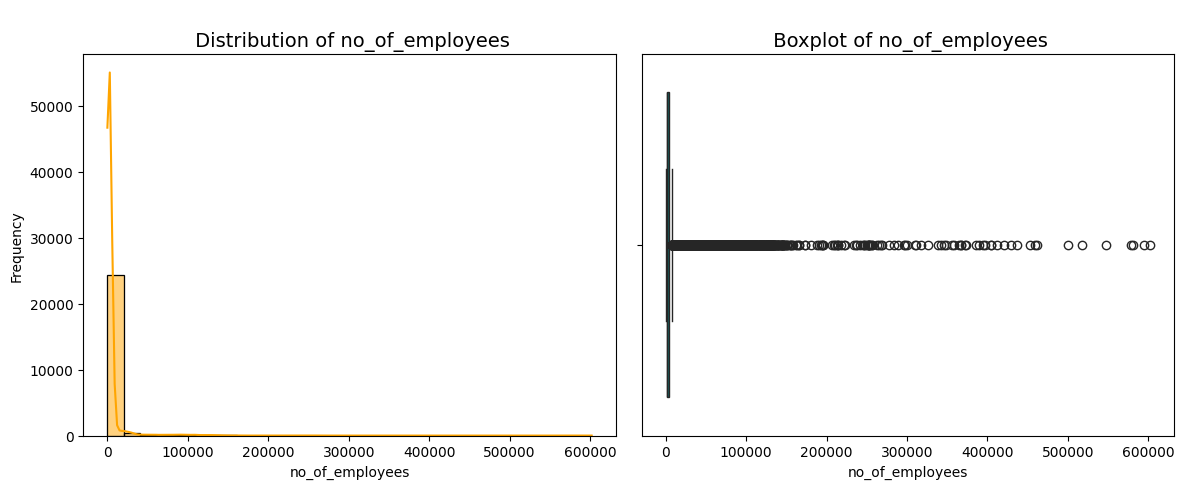

The distribution of no_of_employees is highly skewed. Consider log or Box-Cox transformation.
Feature: yr_of_estab
        yr_of_estab
count  25480.000000
mean    1979.409929
std       42.366929
min     1800.000000
25%     1976.000000
50%     1997.000000
75%     2005.000000
max     2016.000000


Skewness: -2.037
Kurtosis: 3.507




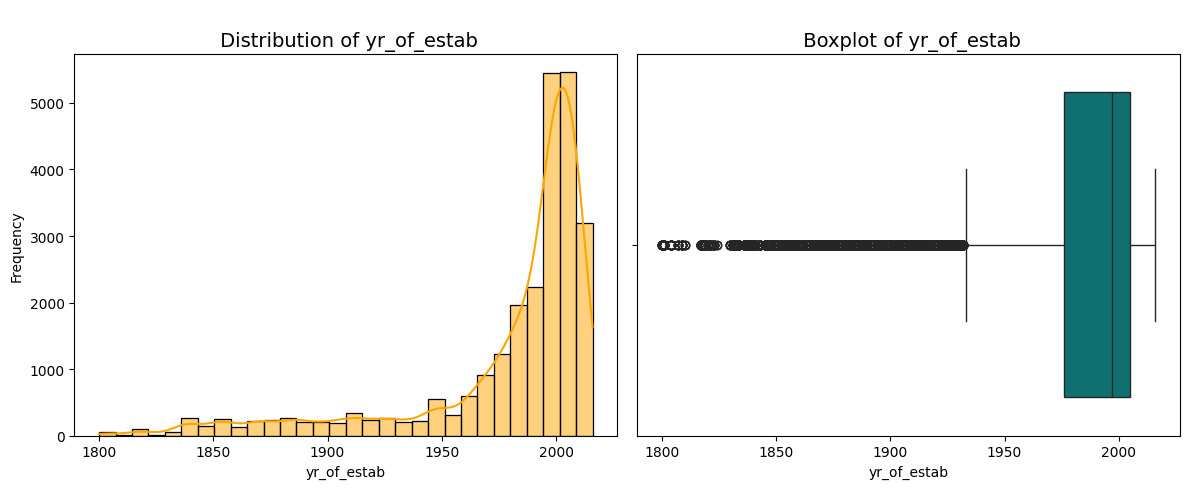

The distribution of yr_of_estab is highly skewed. Consider log or Box-Cox transformation.
Feature: prevailing_wage
       prevailing_wage
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000


Skewness: 0.756
Kurtosis: 0.824




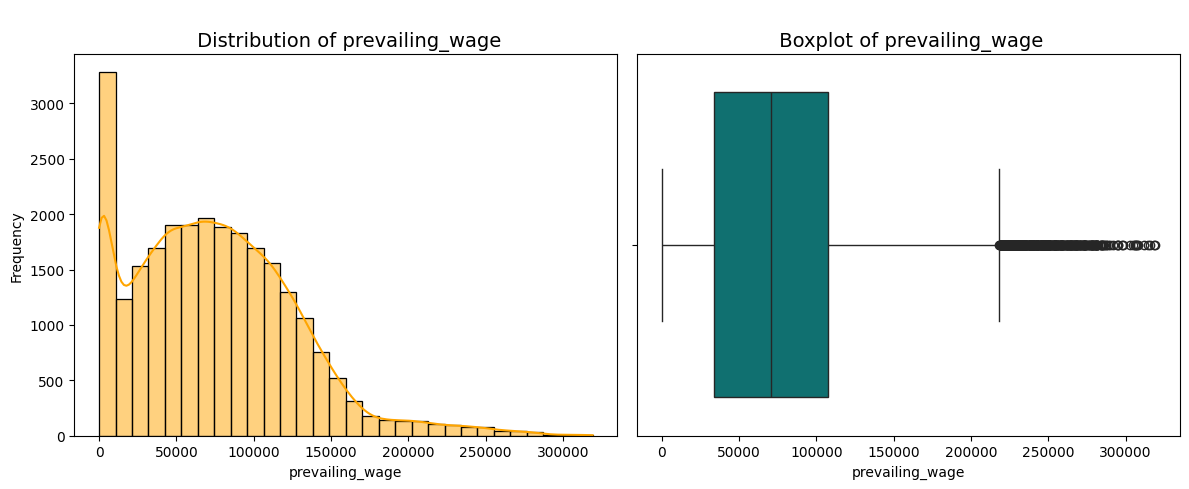

The distribution of prevailing_wage is moderately skewed. Consider square root transformation.


In [10]:
def univariate_numerical_analysis(df, column):
    
    print(f"Feature: {column}")
    print("=" * 40)
    print(df[column].describe().to_frame())
    print("\n")
    print(f"Skewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurtosis():.3f}") 
    print("\n")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f'\n Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    if abs(df[column].skew()) > 1:
        print(f"The distribution of {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"The distribution of {column} is moderately skewed. Consider square root transformation.")
    else:
        print(f"The distribution of {column} is approximately symmetric.")
        
for col in num_cols:
    univariate_numerical_analysis(df, col)

Feature: continent
               Count  Percentage
continent                       
asia           16861       66.17
europe          3732       14.65
north america   3292       12.92
south america    852        3.34
africa           551        2.16
oceania          192        0.75



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


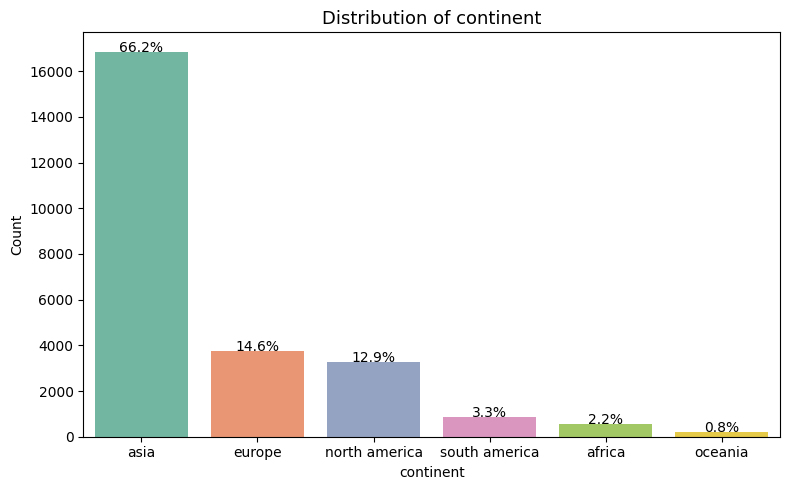

Feature: education_of_employee
                       Count  Percentage
education_of_employee                   
bachelor's             10234       40.16
master's                9634       37.81
high school             3420       13.42
doctorate               2192        8.60



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


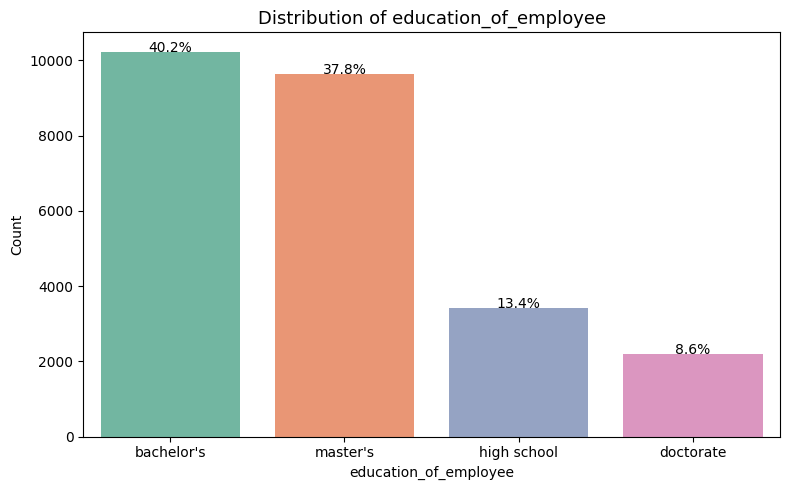

Feature: has_job_experience
                    Count  Percentage
has_job_experience                   
y                   14802       58.09
n                   10678       41.91



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


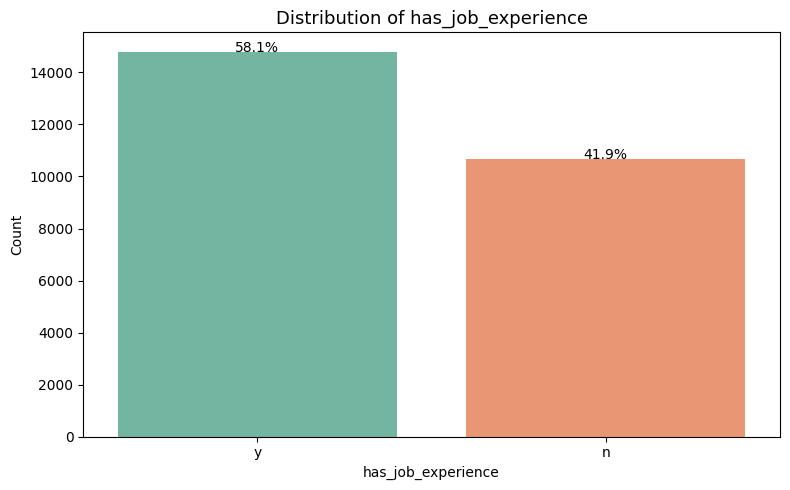

Feature: requires_job_training
                       Count  Percentage
requires_job_training                   
n                      22525        88.4
y                       2955        11.6



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


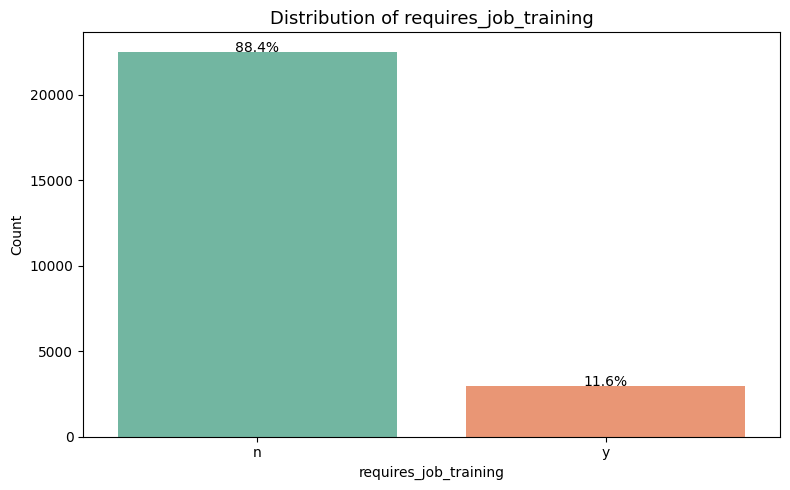

Feature: region_of_employment
                      Count  Percentage
region_of_employment                   
northeast              7195       28.24
south                  7017       27.54
west                   6586       25.85
midwest                4307       16.90
island                  375        1.47



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


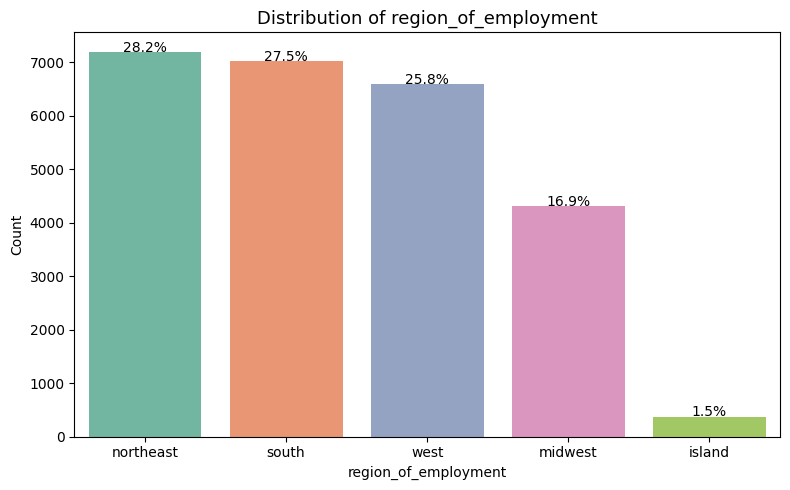

Feature: unit_of_wage
              Count  Percentage
unit_of_wage                   
year          22962       90.12
hour           2157        8.47
week            272        1.07
month            89        0.35



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


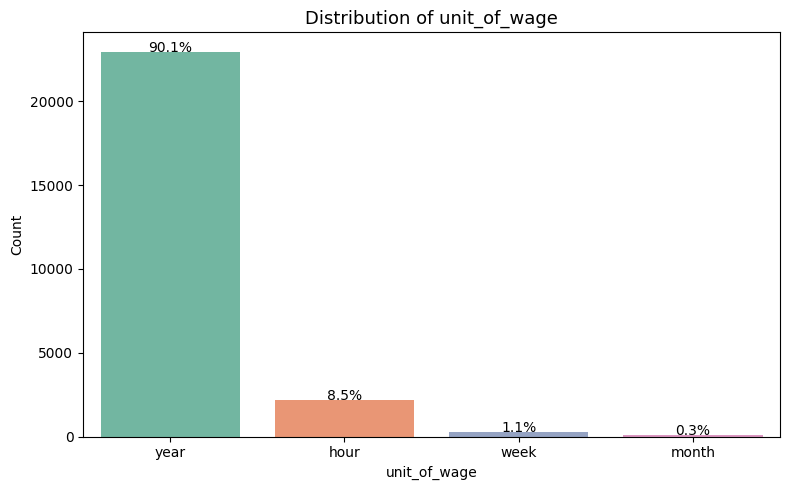

Feature: full_time_position
                    Count  Percentage
full_time_position                   
y                   22773       89.38
n                    2707       10.62



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


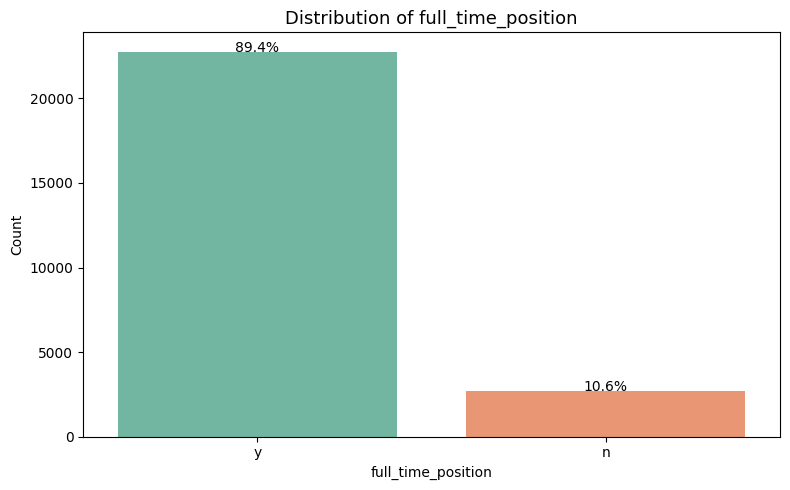

Feature: case_status
             Count  Percentage
case_status                   
certified    17018       66.79
denied        8462       33.21



C:\Users\Oshea\AppData\Local\Temp\ipykernel_6724\2562418414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


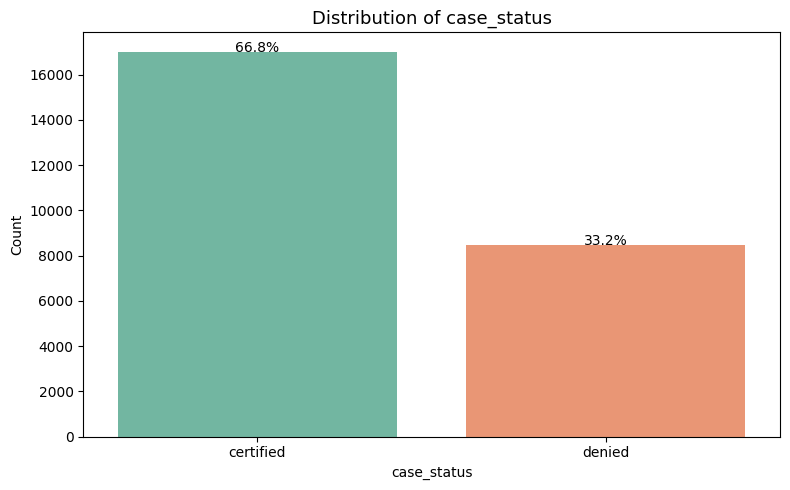

In [11]:
def univariate_categorical_analysis(df, column):
    
    print(f"Feature: {column}")
    print("=" * 40)
    
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()
    
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')
    
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total) * 100:.1f}%', ha = 'center')
    
    plt.tight_layout()
    plt.show()


for col in cat_cols:
    univariate_categorical_analysis(df, col)

## **Correlations**

In [40]:
# Mapping target labels
def mapping_target(x):
    if x == 'denied':
        return 0
    else:
        return 1


df['case_status'] = df['case_status'].map({'denied': 0, 'certified': 1})

df['case_status'].value_counts()


case_status
1    17018
0     8462
Name: count, dtype: int64

In [41]:
df.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
case_id,,,,,,,,,,,
ezyv01,asia,high school,n,n,14513,2007,west,592.2029,hour,y,0
ezyv02,asia,master's,y,n,2412,2002,northeast,83425.6500,year,y,1
ezyv03,asia,bachelor's,n,y,44444,2008,west,122996.8600,year,y,0
ezyv04,asia,bachelor's,n,n,98,1897,west,83434.0300,year,y,0
ezyv05,africa,master's,y,n,1082,2005,south,149907.3900,year,y,1


In [42]:
def correlation_with_target(df, target_col, figsize=(10, 2)):
    
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
    
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)
    
    corrs_df = corrs.to_frame(name='corr').T

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=13)
    plt.tight_layout()
    plt.show()
    
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

In [44]:
def annotated_target_heatmap(df, target_col, figsize=(12, 2.5)):
    # Compute correlation matrix (numeric columns only)
    corr = df.corr(numeric_only=True)
    
    # Extract correlation with the target column
    corr_series = corr[target_col].sort_values(ascending=False)
    
    # Plot annotated heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr[[target_col]].sort_values(by=target_col, ascending=False),
        annot=True,
        cmap='coolwarm',
        center=0
    )
    plt.title(f'Correlation with Target: {target_col}')
    plt.tight_layout()
    plt.show()
    
    # Return correlation values
    return corr_series


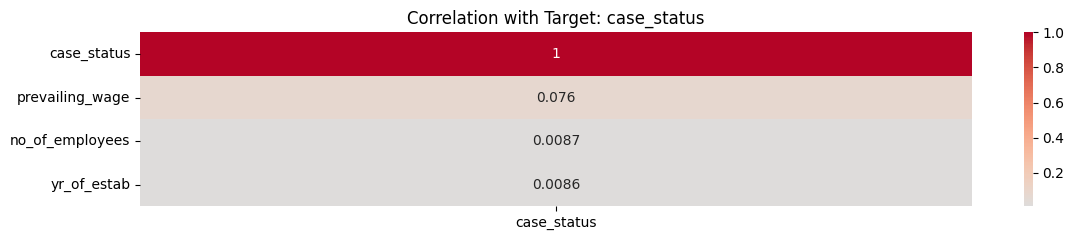

case_status        1.000000
prevailing_wage    0.076198
no_of_employees    0.008677
yr_of_estab        0.008597
Name: case_status, dtype: float64


In [45]:
corr_series = annotated_target_heatmap(df, 'case_status', figsize=(12,2.5))
print(corr_series) 

Target Correlation Analysis Complete


,Feature,Type,Correlation
0,education_of_employee,Categorical,0.330
1,unit_of_wage,Categorical,0.208
2,has_job_experience,Categorical,0.192
3,continent,Categorical,0.117
4,region_of_employment,Categorical,0.108
5,prevailing_wage,Numeric,0.076
6,full_time_position,Categorical,0.011
7,no_of_employees,Numeric,0.009
8,yr_of_estab,Numeric,0.009
9,requires_job_training,Categorical,0.005


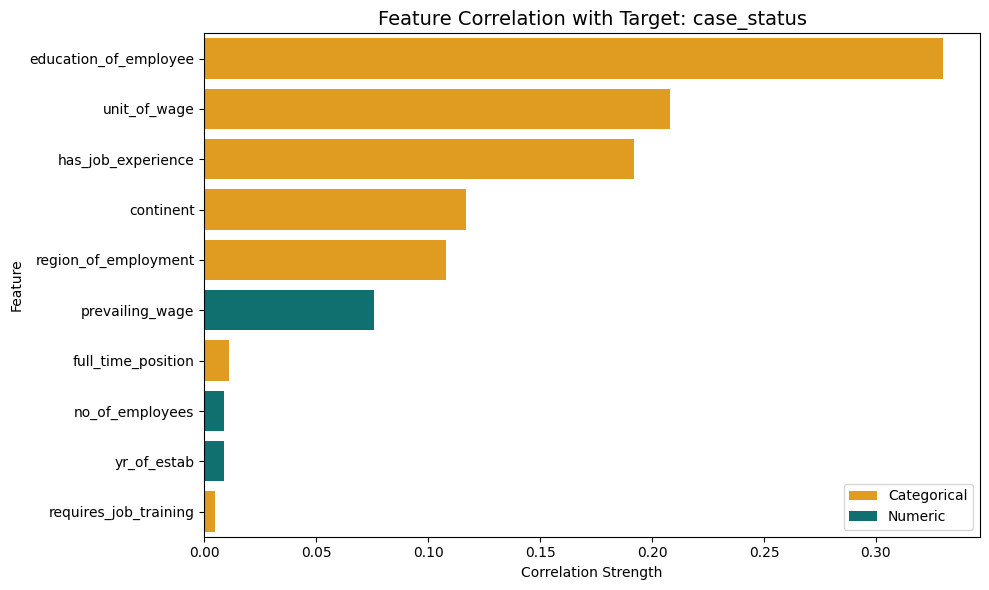

In [46]:
from scipy.stats import pointbiserialr, chi2_contingency
import matplotlib.pyplot as plt

def target_correlation_analysis(df, target='case_status', plot=True):
 
    # Defensive copy
    data = df.copy()

    # Identify column types
    num_cols = data.select_dtypes(include='number').columns.drop(target, errors='ignore')
    cat_cols = data.select_dtypes(exclude='number').columns

    results = []

    # Numeric columns → Point-Biserial correlation
    for col in num_cols:
        try:
            corr, pval = pointbiserialr(data[col], data[target])
            results.append({'Feature': col, 'Type': 'Numeric', 'Correlation': corr})
        except Exception as e:
            print(f"Skipping {col}: {e}")

    # Categorical columns → Cramér’s V
    def cramers_v(cat1, cat2):
        confusion_matrix = pd.crosstab(cat1, cat2)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    for col in cat_cols:
        try:
            v = cramers_v(data[col], data[target])
            results.append({'Feature': col, 'Type': 'Categorical', 'Correlation': v})
        except Exception as e:
            print(f"Skipping {col}: {e}")

    # Combine all results
    corr_df = pd.DataFrame(results)
    corr_df['Correlation'] = corr_df['Correlation'].round(3)
    corr_df = corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

    print("Target Correlation Analysis Complete")
    display(corr_df)

    # Optional bar plot
    if plot and not corr_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=corr_df,
            y='Feature',
            x='Correlation',
            hue='Type',
            dodge=False,
            palette={'Numeric': 'teal', 'Categorical': 'orange'}
        )
        plt.title(f"Feature Correlation with Target: {target}", fontsize=14)
        plt.xlabel("Correlation Strength")
        plt.ylabel("Feature")
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    return corr_df


corr_summary = target_correlation_analysis(df, target='case_status')


## **Bivariate Analysis**

In [50]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency, f_oneway

def bivariate_analysis(df, target):
   
    print("🔹 Numeric vs Target (Correlation)")
    for col in num_cols:
        corr, p = pearsonr(df[col], df[target])
        print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()
    
    print("\n🔹 Categorical vs Target (Distribution Differences)")
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()
        
        # Optional statistical test for difference
        groups = [df[df[col]==cat][target] for cat in df[col].unique()]
        if len(groups) > 1:
            stat, p = f_oneway(*groups)
            print(f"{col}: ANOVA F = {stat:.3f}, p-value = {p:.4f}")


🔹 Numeric vs Target (Correlation)
no_of_employees: correlation = 0.009, p-value = 0.1661


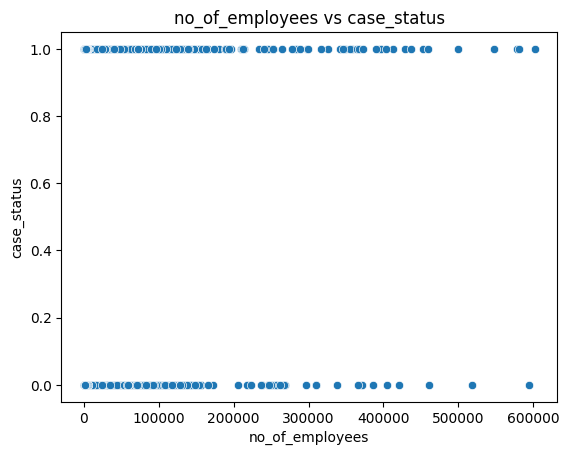

yr_of_estab: correlation = 0.009, p-value = 0.1700


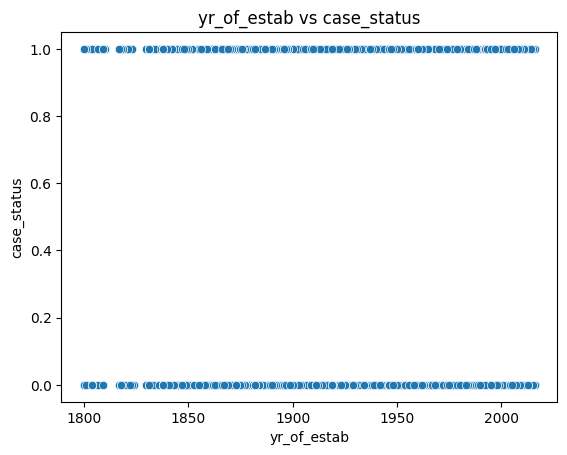

prevailing_wage: correlation = 0.076, p-value = 0.0000


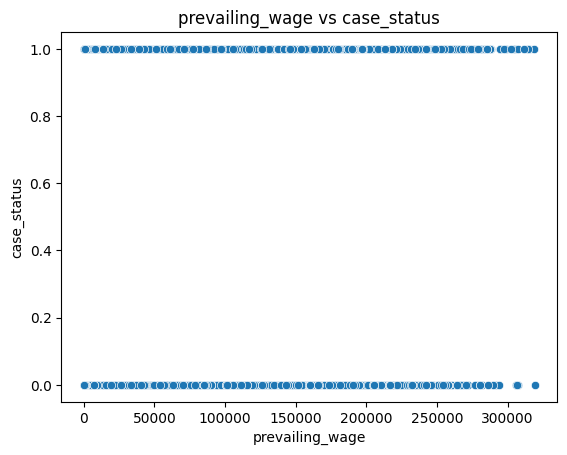


🔹 Categorical vs Target (Distribution Differences)


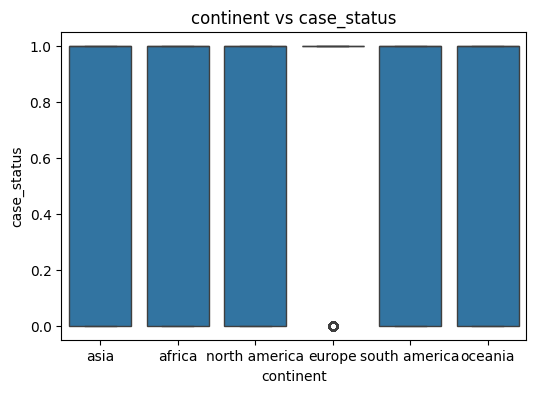

continent: ANOVA F = 71.242, p-value = 0.0000


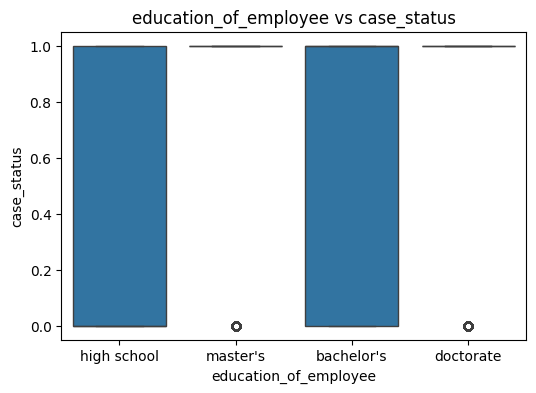

education_of_employee: ANOVA F = 1036.718, p-value = 0.0000


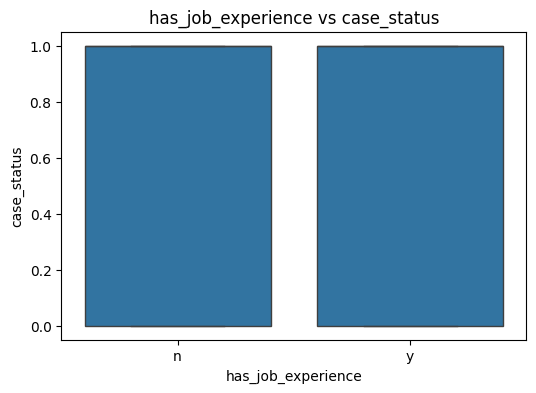

has_job_experience: ANOVA F = 976.884, p-value = 0.0000


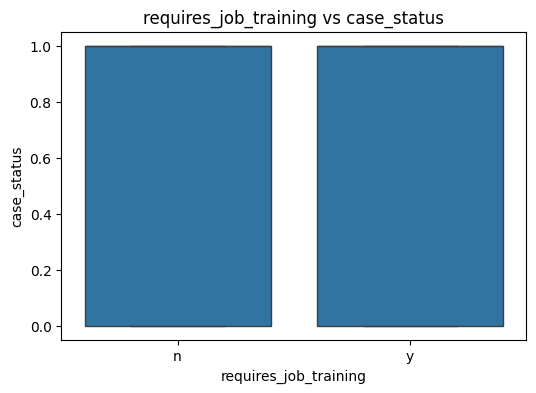

requires_job_training: ANOVA F = 1.808, p-value = 0.1788


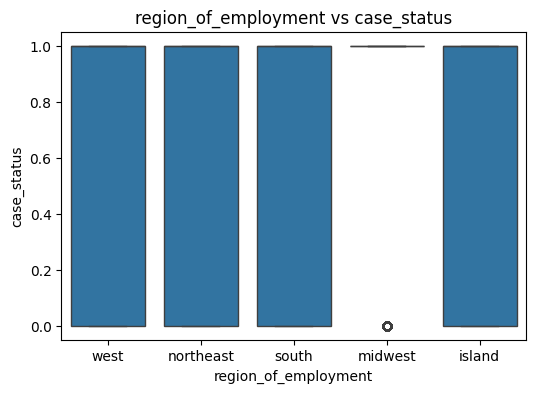

region_of_employment: ANOVA F = 75.482, p-value = 0.0000


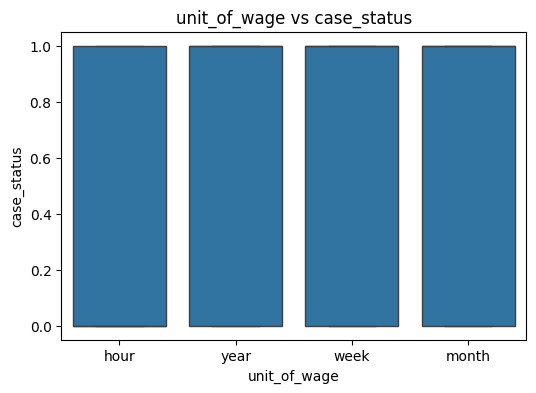

unit_of_wage: ANOVA F = 386.248, p-value = 0.0000


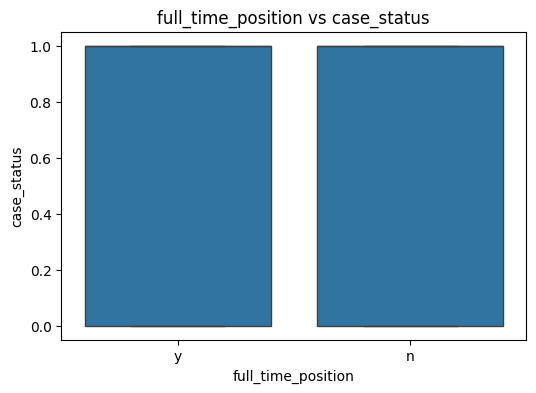

full_time_position: ANOVA F = 4.117, p-value = 0.0425


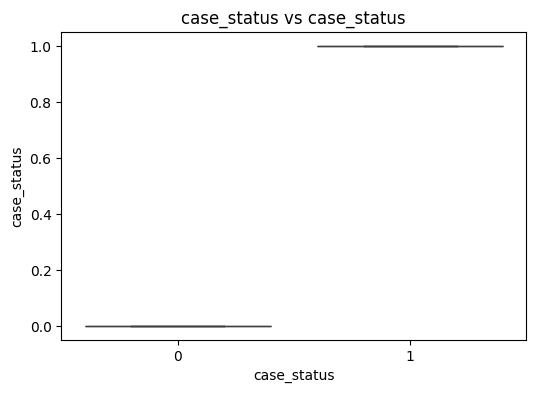

case_status: ANOVA F = inf, p-value = 0.0000


c:\Users\Oshea\Documents\module_3\eda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [49]:
bivariate_analysis(df, target='case_status')


## **Data Copy Saving**

In [51]:
import os

def save_data_copy(df: pd.DataFrame, file_name: str = "cleaned_data.csv", folder: str = "data_output"):
   
    # Ensure folder exists
    os.makedirs(folder, exist_ok=True)

    # Construct full path
    file_path = os.path.join(folder, file_name)

    # Save based on file extension
    ext = os.path.splitext(file_name)[1].lower()

    try:
        if ext == ".csv":
            df.to_csv(file_path, index=False)
        elif ext in [".xlsx", ".xls"]:
            df.to_excel(file_path, index=False)
        elif ext == ".parquet":
            df.to_parquet(file_path, index=False)
        else:
            raise ValueError("Unsupported file format. Use .csv, .xlsx, or .parquet")

        print(f"Data saved successfully at: {file_path}")
        return file_path

    except Exception as e:
        print(f"Failed to save data: {e}")
        return None


In [52]:
save_data_copy(df)

Data saved successfully at: data_output\cleaned_data.csv


'data_output\\cleaned_data.csv'